C:\Users\nanda\AppData\Local\Temp\ipykernel_11088\3093187829.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  x.fillna(method='ffill', inplace=True)  # forward fill missing values


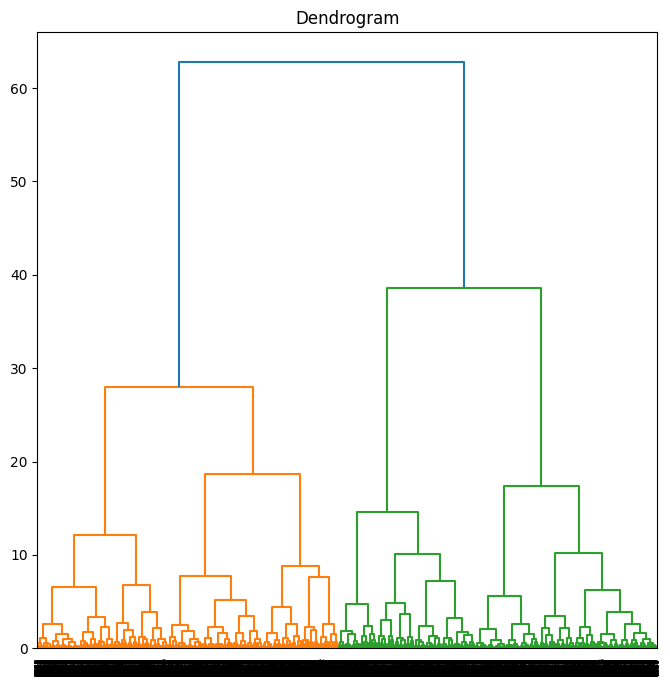

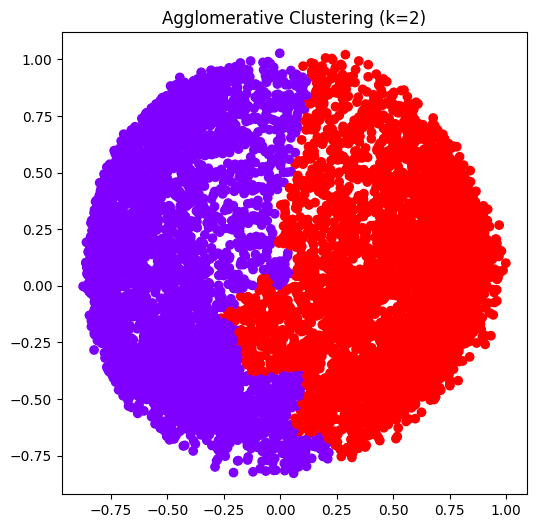

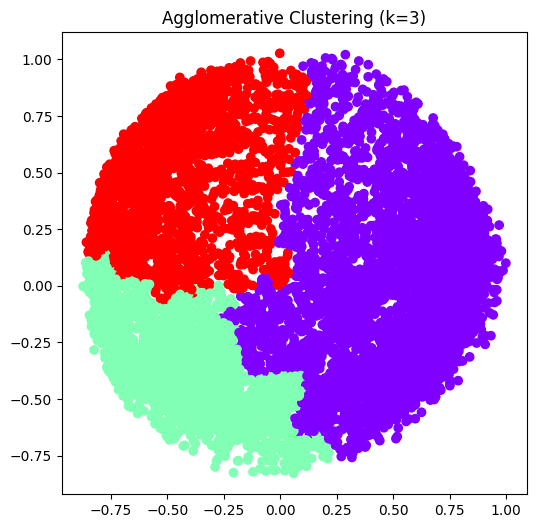

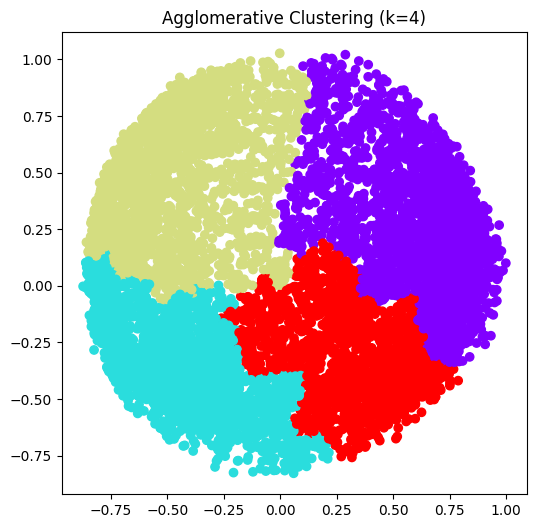

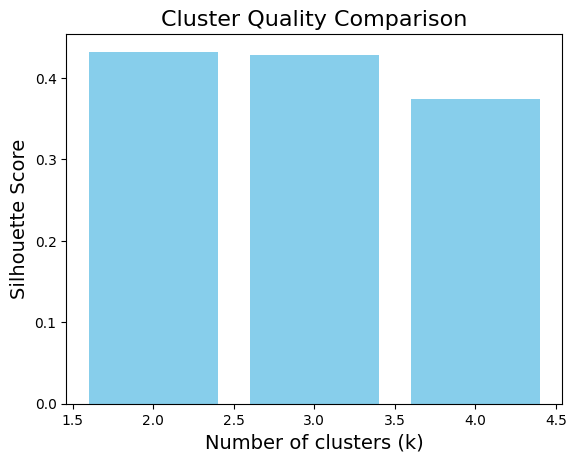

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

# Step 1: Load data
x = pd.read_csv("./CC GENERAL.csv")

# Step 2: Preprocessing
x = x.drop('CUST_ID', axis=1)
x.fillna(method='ffill', inplace=True)  # forward fill missing values

# Step 3: Feature scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Step 4: Normalization
x_normalized = normalize(x_scaled)
x_normalized = pd.DataFrame(x_normalized)

# Step 5: Dimensionality reduction using PCA (for visualization)
pca = PCA(n_components=2)
x_principal = pca.fit_transform(x_normalized)
x_principal = pd.DataFrame(x_principal, columns=['P1', 'P2'])

# Step 6: Dendrogram visualization
plt.figure(figsize=(8, 8))
plt.title('Dendrogram')
dendrogram = shc.dendrogram(shc.linkage(x_principal, method='ward'))
plt.show()

# Step 7: Agglomerative Clustering with 2 clusters
ac2 = AgglomerativeClustering(n_clusters=2)
plt.figure(figsize=(6, 6))
plt.scatter(x_principal['P1'], x_principal['P2'],
            c=ac2.fit_predict(x_principal), cmap='rainbow')
plt.title('Agglomerative Clustering (k=2)')
plt.show()

# Step 8: Agglomerative Clustering with 3 clusters
ac3 = AgglomerativeClustering(n_clusters=3)
plt.figure(figsize=(6, 6))
plt.scatter(x_principal['P1'], x_principal['P2'],
            c=ac3.fit_predict(x_principal), cmap='rainbow')
plt.title('Agglomerative Clustering (k=3)')
plt.show()

# Step 9: Agglomerative Clustering with 4 clusters
ac4 = AgglomerativeClustering(n_clusters=4)
plt.figure(figsize=(6, 6))
plt.scatter(x_principal['P1'], x_principal['P2'],
            c=ac4.fit_predict(x_principal), cmap='rainbow')
plt.title('Agglomerative Clustering (k=4)')
plt.show()

# Step 10: Silhouette score comparison
k = [2, 3, 4]
silhouette_scores = [
    silhouette_score(x_principal, ac2.fit_predict(x_principal)),
    silhouette_score(x_principal, ac3.fit_predict(x_principal)),
    silhouette_score(x_principal, ac4.fit_predict(x_principal))
]

plt.bar(k, silhouette_scores, color='skyblue')
plt.xlabel('Number of clusters (k)', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.title('Cluster Quality Comparison', fontsize=16)
plt.show()
